In [18]:
%matplotlib inline

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc

import os
import random
import pickle

In [19]:
imageFolder = "images"

image_dim = 3 #RGB

imgs = {}

for fileName in ["aerial.jpg", "2000.jpg", "2005.jpg", "2010.jpg", "2016.jpg"]:
    img = misc.imread("/".join([imageFolder, fileName]))

    if image_dim == 1 and len(img.shape) > 2: 
        img = img[:,:,0]
        
    img = img / 255.0
    imgs[fileName] = img

print "Load data complete"

Load data complete


image dimensions: (1757, 3024, 3)


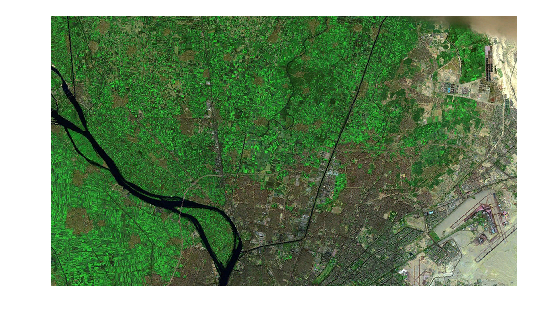

In [20]:
img = imgs["aerial.jpg"]
print "image dimensions:", img.shape

imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')
plt.axis('off')
plt.show()

In [35]:
import math

targetRes = 50

img = imgs["aerial.jpg"]
xStep = int( math.floor( float(img.shape[0]) / targetRes ) )
yStep = int( math.floor( float(img.shape[1]) / targetRes ) )

data = []

for y in range(yStep):
    for x in range(xStep):
        
        sample = []
        
        crop = imgs["aerial.jpg"][x * targetRes : (x + 1) * targetRes, y * targetRes : (y + 1) * targetRes]
        sample.append(crop)

        for layer in ["2000.jpg", "2005.jpg", "2010.jpg", "2016.jpg"]:
            target = imgs[layer][x * targetRes : (x + 1) * targetRes, y * targetRes : (y + 1) * targetRes]
            target_val = int ( round( np.mean(target) ) )
            sample.append(target_val)

        data.append(sample)

image dimensions: (50, 50, 3)
Value at time 0: 1
Value at time 1: 0
Value at time 2: 0
Value at time 3: 1


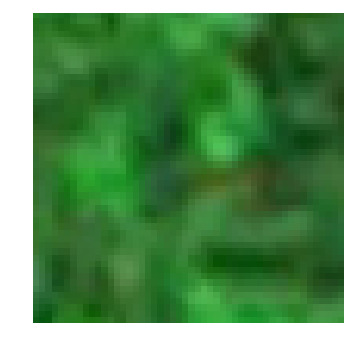

In [47]:
img_index = 100

img = data[img_index][0]
print "image dimensions:", img.shape
print "Value at time 0:", (data[img_index][1])
print "Value at time 1:", (data[img_index][2])
print "Value at time 2:", (data[img_index][3])
print "Value at time 3:", (data[img_index][4])

imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')
plt.axis('off')
plt.show()

2000.jpg


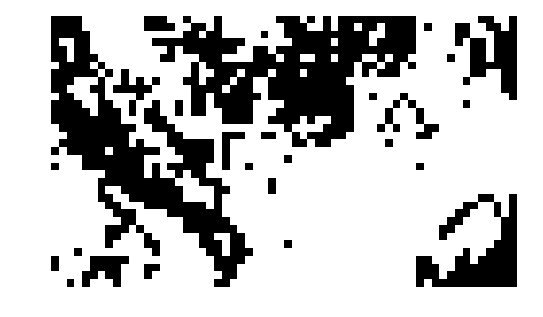

2005.jpg


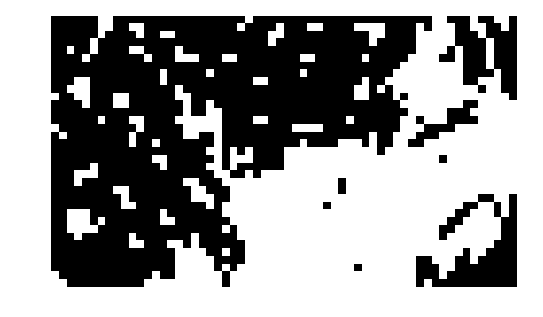

2010.jpg


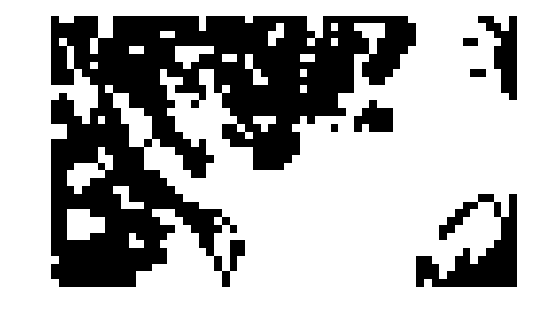

2016.jpg


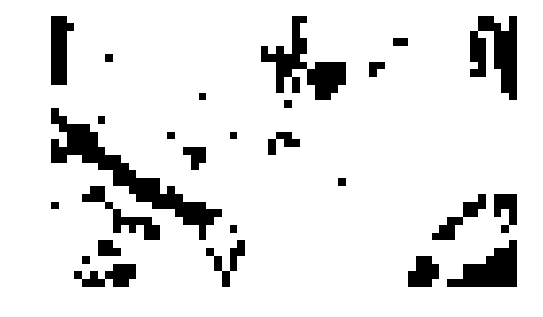

In [46]:
recomp = {}

for i, layer in enumerate(["2000.jpg", "2005.jpg", "2010.jpg", "2016.jpg"]):

    recomp[layer] = np.ndarray((targetRes * xStep, targetRes * yStep), dtype=np.float32)

    for y in range(yStep):
        for x in range(xStep):
            recomp[layer][x * targetRes : (x + 1) * targetRes, y * targetRes : (y + 1) * targetRes] = data[ y * xStep + x ][i+1]

        
for layer in ["2000.jpg", "2005.jpg", "2010.jpg", "2016.jpg"]:
    
    print layer
    imshow(recomp[layer], cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')
    plt.axis('off')
    plt.show()